# TUGAS 4 (Pagerank Implementasi Github)

##Tugas Pagerank

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
G=nx.DiGraph()

##Masukkan nilai Nodes yang saling berhubungan

In [ ]:
G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(1,6),(7,4),(5,6),(6,7),(3,8),(5,7),(7,9),(9,8)])

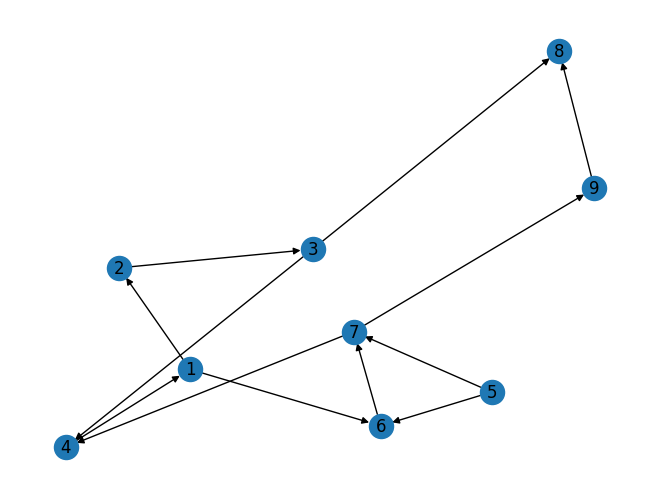

In [ ]:
nx.draw(G,with_labels=True)

##Perhitungan menggunakan NetworkX

In [ ]:
pr = nx.pagerank(G)
pr

{1: 0.14628098026897632,
 2: 0.09331763727305484,
 3: 0.11046631731128456,
 4: 0.13545080717168373,
 6: 0.10655522987453322,
 7: 0.13495578471043795,
 5: 0.031147287099484135,
 8: 0.1533229167481066,
 9: 0.08850303954243854}

In [ ]:
sorted(pr, key=pr.get, reverse=True)

[8, 1, 4, 7, 3, 6, 2, 9, 5]

##Implementasi Github https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb

###Instalasi PyPDF2 dan docx2txt

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=84104f15aa56905e9c9d60e8054ea75b5bd262390dadafcab0e1d494c7f01dbc
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


###Import Library

In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

###Membaca dokumen

In [ ]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

###Tokenisasi pada dokumen

In [ ]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()
    
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

###Baca dokumen

In [ ]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: story1.txt
You have asked for the document story1.txt
1
<class 'str'>
The length of the file is: 7127


###Kalimat pada dokumen dalam list

In [ ]:
sentences_list = tokenize(document)

print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))


The size of the list in Bytes is: 872
The size of the item 0 in Bytes is: 147


In [ ]:
for i in sentences_list:
    print(i)

 In Banaras District there is a village called Bira in which an old, childless
widow used to live.
She was a Gond woman named Bhungi and she didn't
own either a scrap of land or a house to live in.
Her only source of livelihood
was a parching oven.
The village folk customarily have one meal a day of
parched grains, so there was always a crowd around Bhungi's oven.
Whatever grain she was paid for parching she would grind or fry and eat it.
She slept in a corner of the same little shack that sheltered the oven.
As soon
as it was light she'd get up and go out to gather dry leaves from all around to
make her fire.
She would stack the leaves right next to the oven, and after
twelve, light the fire.
But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
She
was obliged to work without pay for Pandit Udaybhan Pandey She also had
to fetch water for his house.
And, for this reason, from time to time the oven
was not lit.
She liv

###Perhitungan untuk menghasilkan TD Matrix dokumen

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
cv_demo = CountVectorizer()
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [ ]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <101x492 sparse matrix of type '<class 'numpy.int64'>'
	with 1223 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['able' 'accept' 'acted' 'afraid' 'after' 'again' 'against' 'alarmed'
 'alas' 'all' 'already' 'also' 'always' 'am' 'amid' 'amidst' 'an' 'and'
 'anger' 'another' 'any' 'anybody' 'are' 'around' 'arrived' 'as' 'ashes'
 'asked' 'at' 'attendants' 'attention' 'authority' 'available' 'away'
 'balls' 'banaras' 'band' 'barn' 'basket' 'baskets' 'be' 'because' 'bed'
 'been' 'before' 'began' 'being' 'belly' 'bewildered' 'bhungi' 'bira'
 'blaze' 'body' 'bold' 'breaking' 'breath' 'broke' 'build' 'building'
 'built' 'but' 'by' 'called' 'came' 'can' 'carrying' 'cereal' 'childless'
 'chores' 'clay' 'clustering' 'collapsed' 'collect' 'coming' 'command'
 'completely' 'conflagration' 'considered' 'consumed' 'cooked' 'corner'
 'could' 'courage' '

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.24450772 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <492x101 sparse matrix of type '<class 'numpy.float64'>'
	with 1223 stored elements in Compressed Sparse Column format>>


###Menampilkan Graph

Number of edges 3319
Number of vertices 101


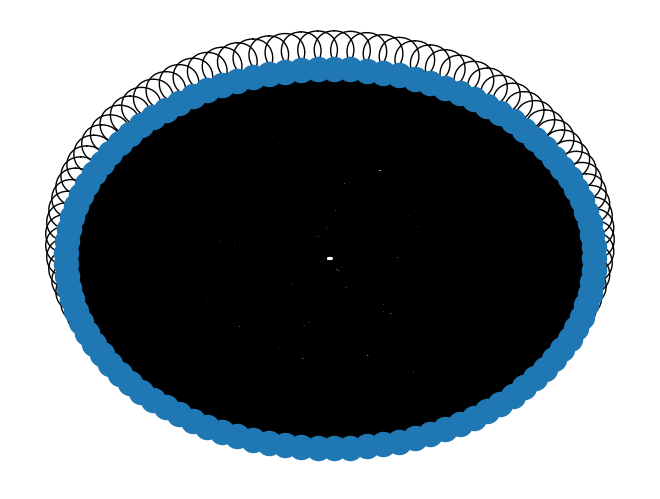

The memory used by the graph in Bytes is: 48


In [ ]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

###Mengambil rank setiap kalimat menggunakan textrank

In [ ]:
ranks = nx.pagerank(nx_graph)

print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 4696
0 0.008473050396994235
1 0.011136728928068603
2 0.009383758113199747
3 0.010305311473077004
4 0.011387878003998006
5 0.011453806553948459
6 0.011956616615231173
7 0.013007582297781907
8 0.01646287839865644
9 0.011870375394732305
10 0.012805637163062402
11 0.012625721662310345
12 0.010081809427917856
13 0.012615817098175835
14 0.009951004198363802
15 0.012312866898217463
16 0.00905563154351586
17 0.007114339155021146
18 0.0067471140170273294
19 0.01107854731351773
20 0.010166769608001893
21 0.012780859072392963
22 0.012641302785309182
23 0.009348558444248853
24 0.010022831759849004
25 0.013720926664709483
26 0.00967523353291061
27 0.013901992235429548
28 0.009475796944343159
29 0.008121737705990758
30 0.010128784557098498
31 0.010061180193377258
32 0.007628895359126891
33 0.008648669935446914
34 0.009607446148227936
35 0.008321167851894651
36 0.005865449854506728
37 0.010850655936218322
38 0.01016989679015465
39 0.01131627

###Mencari kalimat penting

In [ ]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)


rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

print(rank_max)
print(rank_min)

0.01646287839865644
0.005429708840559132


In [ ]:
temp_array = []

flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

101


In [ ]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

model = sentence_list

###Masukkan kalimat penting pada dokumen baru

In [ ]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('story3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry. People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them. 'If you’re going to stay in the village you'll have to do my chores. He kicked at the trough again but she ran in front of it
and took the kick in her side. She had to
keep stopping from the parching in order to keep the oven fire going. Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high. With this command the servants went away and Bhungi began to parch the
grain. Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days. ‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven. By now the
wh

<function TextIOWrapper.close()>